In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    # if previous search failed or too long, comment the previous line and simply write down manually the path below :
    path_to_file = '/content/gdrive/My Drive/CS5340_project/cs5340-covid-pgm/notebook/'
    print(path_to_file)
    # change current path to the folder containing "file_name"
    os.chdir(path_to_file)
    !pwd

Mounted at /content/gdrive
/content/gdrive/My Drive/CS5340_project/cs5340-covid-pgm/notebook/
/content/gdrive/My Drive/CS5340_project/cs5340-covid-pgm/notebook


In [2]:
!pip install pgmpy

     |████████████████████████████████| 1.9 MB 5.1 MB/s 


In [3]:
import pandas as pd
import numpy as np

In [4]:
import pickle
import pgmpy

In [5]:
with open("../models/bayesian_18countries_learnt_bn_treesearch.pickle", "rb") as handle:
  model = pickle.load(handle)

In [6]:
train_df = pd.read_csv("../data/processed/train_18_countries.csv")
print(train_df.shape)
train_df.head()

(495, 307)


,deaths_per_mil_cat_india,facial_covering_new_zealand,cancel_public_events_argentina,debt_relief_india,income_support_singapore,school_closures_argentina,vaccine_policy_china,restriction_internal_movement_indonesia,workplace_closures_finland,internation_travel_control_finland,...,cases_per_mil_cat_finland,cases_per_mil_cat_hong_kong,cases_per_mil_cat_indonesia,cases_per_mil_cat_india,cases_per_mil_cat_israel,cases_per_mil_cat_malaysia,cases_per_mil_cat_new_zealand,cases_per_mil_cat_singapore,cases_per_mil_cat_united_states,cases_per_mil_cat_south_africa
0,0,3,2,1.0,2,1,5,2,1,2.0,...,1,0,1,1,5,3,0,1,6,2
1,0,2,2,0.0,2,3,4,2,2,3.0,...,1,0,0,1,4,1,0,1,4,1
2,0,3,1,1.0,2,0,5,2,1,2.0,...,4,0,1,1,6,4,0,3,6,3
3,0,3,2,1.0,2,1,5,2,1,2.0,...,1,0,1,1,5,3,0,1,5,2
4,0,2,2,0.0,2,1,4,2,2,3.0,...,1,0,0,0,4,1,0,1,4,1


In [7]:
test_df = pd.read_csv("../data/processed/test_18_countries.csv")
print(test_df.shape)
test_df.head()

(165, 307)


,deaths_per_mil_cat_india,facial_covering_new_zealand,cancel_public_events_argentina,debt_relief_india,income_support_singapore,school_closures_argentina,vaccine_policy_china,restriction_internal_movement_indonesia,workplace_closures_finland,internation_travel_control_finland,...,cases_per_mil_cat_finland,cases_per_mil_cat_hong_kong,cases_per_mil_cat_indonesia,cases_per_mil_cat_india,cases_per_mil_cat_israel,cases_per_mil_cat_malaysia,cases_per_mil_cat_new_zealand,cases_per_mil_cat_singapore,cases_per_mil_cat_united_states,cases_per_mil_cat_south_africa
0,0,3,1,1.0,2,0,5,2,1,2.0,...,4,0,1,1,6,4,0,3,6,3
1,0,3,2,1.0,2,1,5,2,1,2.0,...,1,0,1,1,6,3,0,1,6,2
2,0,2,2,2.0,2,3,0,2,1,3.0,...,0,0,0,0,1,0,0,1,1,1
3,0,3,2,1.0,2,1,5,2,1,2.0,...,1,0,1,1,5,3,0,1,5,2
4,0,0,2,2.0,2,3,0,1,1,3.0,...,0,0,0,0,0,0,0,0,1,0


In [8]:
# Learn model again with dates added in 
covid_policies_df = pd.read_csv(
    "../data/processed/Final_Data_Combined.csv", index_col=0
)
print(covid_policies_df.shape)
covid_policies_df["date"] = pd.to_datetime(covid_policies_df["Date"])
covid_policies_df["Country"] = covid_policies_df["Country"].str.lower()
covid_policies_df["Country"] = covid_policies_df["Country"].str.replace(" ", "_")
covid_policies_df.rename(columns={"Country": "country"}, inplace=True)
covid_policies_df.set_index(["country", "date"], inplace=True)
covid_policies_df.drop(columns=["Date"], inplace=True)
covid_policies_df.rename(
    columns={col: col.lower() for col in covid_policies_df.columns}, inplace=True
)
print(covid_policies_df.shape)
for column in covid_policies_df.columns:
    if pd.api.types.is_numeric_dtype(covid_policies_df[column].dtype):
        continue

    covid_policies_df[column] = (
        covid_policies_df[column].apply(lambda v: v[:1]).astype("int16")
    )
country_to_population_map = { # for 2021
    "argentina": 45.85e6,
    "australia": 25750198,
    "brazil": 212.61e6,
    "canada": 37.74e6,
    "switzerland": 8.66e6,
    "germany": 83900473,
    "egypt": 101.48e6,
    "finland": 5.54e6,
    "india": 1.39e9,
    "united_states": 332915073,
    "new_zealand": 5122600,
    "south_africa": 60e6,
    "hong_kong": 7500000,
    "china": 1448000000,
    "indonesia": 272000000,
    "singapore": 5450000,
    "malaysia": 32000000,
    "israel": 9.45e6
}
def compute_cases_bin(cases_per_mil):
    computed_bin = None
    if cases_per_mil <= 10000:
        computed_bin = 0
    elif cases_per_mil < 30000:
        computed_bin = 1
    elif cases_per_mil < 50000:
        computed_bin = 2
    elif cases_per_mil < 70000:
        computed_bin = 3
    elif cases_per_mil < 100000:
        computed_bin = 4
    elif cases_per_mil < 120000:
        computed_bin = 5
    else:
        computed_bin = 6

    return computed_bin

covid_policies_df["cases_per_mil"] = covid_policies_df.apply(lambda row: (row.confirmed_cases * 1000000)/ country_to_population_map[row.name[0]], axis=1)
covid_policies_df["cases_per_mil_cat"] = covid_policies_df["cases_per_mil"].apply(compute_cases_bin)
print(covid_policies_df.shape)
covid_policies_df.drop("cases_per_mil", axis = 1, inplace=True)
covid_policies_df["deaths_per_mil"] = covid_policies_df.apply(lambda row: (row.confirmed_deathes * 1000000)/ country_to_population_map[row.name[0]], axis=1)
covid_policies_df["deaths_per_mil_cat"] = covid_policies_df["deaths_per_mil"].apply(compute_cases_bin)
covid_policies_df.drop("deaths_per_mil", axis = 1, inplace=True)

covid_policies_df = covid_policies_df.reset_index()
for c in covid_policies_df.country.unique():
    exec(f"df_{c} = covid_policies_df[covid_policies_df.country == \"{c}\"]")
    eval(f"print(\"Size of df_{c}\",df_{c}.shape)")
for c in covid_policies_df.country.unique():
  exec(f"df_{c} = df_{c}.add_suffix('_{c}')")
m4 = df_china
for c in covid_policies_df.country.unique():
  if c != "china":
    # china already assigned
    exec(f"m4 = pd.merge(m4, df_{c}, left_on='date_china', right_on='date_{c}')")
m4.rename(columns={"date_china": "date"}, inplace=True)
columns_to_drop = m4.filter(regex="^country_|^date_|^confirmed_cases_|^confirmed_deathes_").columns
new_df = m4.drop(columns_to_drop, axis = 1)
new_df["date"] = pd.to_datetime(new_df['date'])
y_cols = list(new_df.filter(regex="^cases_per_mil_cat_").columns)
x_cols = list(set(new_df.columns) - set(y_cols))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    new_df[x_cols], new_df[y_cols], random_state = 42
)



(11993, 19)
(11993, 17)
(11993, 19)
Size of df_argentina (661, 21)
Size of df_australia (667, 21)
Size of df_brazil (667, 21)
Size of df_canada (667, 21)
Size of df_switzerland (667, 21)
Size of df_china (667, 21)
Size of df_germany (667, 21)
Size of df_egypt (667, 21)
Size of df_finland (667, 21)
Size of df_hong_kong (666, 21)
Size of df_indonesia (667, 21)
Size of df_india (667, 21)
Size of df_israel (667, 21)
Size of df_malaysia (661, 21)
Size of df_new_zealand (667, 21)
Size of df_singapore (667, 21)
Size of df_united_states (667, 21)
Size of df_south_africa (667, 21)


In [9]:
train_df = train_df.astype(int)
test_df = test_df.astype(int)

In [10]:
train_df["date_full"] = x_train["date"].reset_index(drop=True)
test_df["date_full"] = x_test["date"].reset_index(drop=True)

In [11]:
# def date2category(date):
#   y = date.dt.year
#   m = date.dt.month
#   print(m, y)
#   category = str(y)
#   if 1 <= m <= 3:
#     return category + "1st_quarter"
#   elif 4 <= m <= 6:
#     return category + "2nd_quarter"
#   elif 5 <= m <= 8:
#     return category + "3rd_quarter"
#   else:
#     return category + "4th_quarter"

In [12]:
train_df["year"] = pd.to_datetime(train_df["date_full"]).dt.year

In [13]:
train_df.rename(columns={"date": "month"}, inplace=True)

In [14]:
train_df["date_category"] = train_df["month"].astype(str) + "_" + train_df["year"].astype(str)

In [15]:
train_df.head()

,deaths_per_mil_cat_india,facial_covering_new_zealand,cancel_public_events_argentina,debt_relief_india,income_support_singapore,school_closures_argentina,vaccine_policy_china,restriction_internal_movement_indonesia,workplace_closures_finland,internation_travel_control_finland,...,cases_per_mil_cat_india,cases_per_mil_cat_israel,cases_per_mil_cat_malaysia,cases_per_mil_cat_new_zealand,cases_per_mil_cat_singapore,cases_per_mil_cat_united_states,cases_per_mil_cat_south_africa,date_full,year,date_category
0,0,3,2,1,2,1,5,2,1,2,...,1,5,3,0,1,6,2,2021-09-03,2021,9_2021
1,0,2,2,0,2,3,4,2,2,3,...,1,4,1,0,1,4,1,2021-04-17,2021,4_2021
2,0,3,1,1,2,0,5,2,1,2,...,1,6,4,0,3,6,3,2022-01-20,2022,1_2022
3,0,3,2,1,2,1,5,2,1,2,...,1,5,3,0,1,5,2,2021-08-27,2021,8_2021
4,0,2,2,0,2,1,4,2,2,3,...,0,4,1,0,1,4,1,2021-04-02,2021,4_2021


In [16]:
test_df["year"] = pd.to_datetime(test_df["date_full"]).dt.year

In [17]:
test_df.rename(columns={"date": "month"}, inplace=True)

In [18]:
test_df["date_category"] = test_df["month"].astype(str) + "_" + test_df["year"].astype(str)

In [19]:
from pgmpy.estimators import TreeSearch
est = TreeSearch(data=train_df)
estimated_model = est.estimate(estimator_type='chow-liu')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Building tree:   0%|          | 0/47895.0 [00:00<?, ?it/s]

In [20]:
from pgmpy.models import BayesianNetwork
learnt_bn = BayesianNetwork(list(estimated_model.edges))
from pgmpy.estimators import MaximumLikelihoodEstimator
learnt_bn.fit(train_df, MaximumLikelihoodEstimator)

In [21]:
from pgmpy.inference import VariableElimination

ve = VariableElimination(learnt_bn)

In [22]:
# import networkx as nx
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(1,1, figsize=(80,80))
# nx.draw(model, with_labels=True, ax=ax)
# plt.tight_layout()

In [23]:
cols_to_remove = list(set(test_df.columns) - set(learnt_bn.nodes()))

In [24]:
cols_to_remove

[]

In [25]:
cols_to_remove = cols_to_remove + list(test_df.filter(regex="[a-z]_singapore").columns)
print(cols_to_remove)

['income_support_singapore', 'shn_requirement_singapore', 'contact_tracing_singapore', 'deaths_per_mil_cat_singapore', 'vaccine_policy_singapore', 'restriction_internal_movement_singapore', 'testing_policy_singapore', 'internation_travel_control_singapore', 'pi_campaign_singapore', 'school_closures_singapore', 'cancel_public_events_singapore', 'debt_relief_singapore', 'workplace_closures_singapore', 'restrict_public_gathering_singapore', 'closure_public_transport_singapore', 'facial_covering_singapore', 'cases_per_mil_cat_singapore']


In [26]:
sys.path.append("..")
from src.utils import compute_evaluation_metrics

In [ ]:
result_dict = {}
for country in covid_policies_df.country.unique():
  result_dict[country] = {}
  preds_df = pd.DataFrame()
  cols_to_remove = list(test_df.filter(regex=f"[a-z]_{country}").columns)
  for c in cols_to_remove:
    preds = []
    for idx, row in test_df.drop(cols_to_remove, axis = 1).iterrows():
      # evidence = row.to_dict()
      evidence = {"date_category": row["date_category"]}
      # print(evidence)
      res = ve.query(
            [c], evidence=evidence, show_progress=False
        )
      ans_dict = {}
      for key, val in zip(res.state_names[res.variables[0]], res.values):
        ans_dict[key] = val
      max_val = max(ans_dict, key=ans_dict.get)
      preds.append(max_val)
    preds_df[f"{c}_predicted"] = preds
    ypred = preds_df[f"{c}_predicted"].values
    ytrue = test_df[c].values
    result_dict[country][c] = compute_evaluation_metrics(ytrue, ypred)

In [ ]:
result_dict


In [27]:
train_df["date_category"].unique()

array(['9_2021', '4_2021', '1_2022', '8_2021', '9_2020', '12_2020',
       '6_2020', '7_2020', '10_2020', '11_2021', '5_2020', '11_2020',
       '10_2021', '1_2021', '3_2021', '12_2021', '5_2021', '6_2021',
       '7_2021', '2_2021', '2_2022', '8_2020'], dtype=object)

In [28]:
cols_to_remove

['income_support_singapore',
 'shn_requirement_singapore',
 'contact_tracing_singapore',
 'deaths_per_mil_cat_singapore',
 'vaccine_policy_singapore',
 'restriction_internal_movement_singapore',
 'testing_policy_singapore',
 'internation_travel_control_singapore',
 'pi_campaign_singapore',
 'school_closures_singapore',
 'cancel_public_events_singapore',
 'debt_relief_singapore',
 'workplace_closures_singapore',
 'restrict_public_gathering_singapore',
 'closure_public_transport_singapore',
 'facial_covering_singapore',
 'cases_per_mil_cat_singapore']

In [29]:
policy1_df = pd.DataFrame(columns = ['date_category'] + cols_to_remove)
policy1_df["date_category"] = ["5_2020", "6_2020", "7_2020", "8_2020", "9_2020", "10_2020", "11_2020", "12_2020",\
                               "1_2021", "2_2021", "3_2021", "4_2021", "5_2021", "6_2021", "7_2021", "8_2021", \
                               "9_2021", "10_2021", "11_2021", "12_2021", "1_2022", "2_2022"]
for c in cols_to_remove:
  preds = []
  for d in policy1_df["date_category"]:
    res = (ve.query(
            [c], evidence={"date_category": d}, show_progress=False
        ))
    ans_dict = {}
    for key, val in zip(res.state_names[res.variables[0]], res.values):
      ans_dict[key] = val
    max_val = max(ans_dict, key=ans_dict.get)
    preds.append(max_val)
  policy1_df[c] = preds

In [30]:
policy1_df

,date_category,income_support_singapore,shn_requirement_singapore,contact_tracing_singapore,deaths_per_mil_cat_singapore,vaccine_policy_singapore,restriction_internal_movement_singapore,testing_policy_singapore,internation_travel_control_singapore,pi_campaign_singapore,school_closures_singapore,cancel_public_events_singapore,debt_relief_singapore,workplace_closures_singapore,restrict_public_gathering_singapore,closure_public_transport_singapore,facial_covering_singapore,cases_per_mil_cat_singapore
0,5_2020,1,2,2,0,0,2,2,3,2,3,2,2,2,2,0,4,0
1,6_2020,2,2,2,0,0,2,2,3,2,1,2,2,2,2,0,4,0
2,7_2020,2,1,2,0,0,0,2,3,2,1,2,2,2,2,0,4,0
3,8_2020,2,1,2,0,0,0,2,3,2,1,2,2,2,2,0,4,1
4,9_2020,2,1,2,0,0,0,2,3,2,1,2,2,2,2,0,4,1
5,10_2020,2,1,2,0,0,0,2,3,2,1,1,2,2,2,0,4,1
6,11_2020,2,1,2,0,0,0,2,3,2,1,1,2,2,2,0,4,1
7,12_2020,2,1,2,0,0,0,2,3,2,1,1,2,2,4,0,4,1
8,1_2021,2,1,2,0,1,0,3,3,2,1,1,2,2,4,0,4,1
9,2_2021,2,1,2,0,2,0,3,3,2,1,1,2,2,4,0,4,1


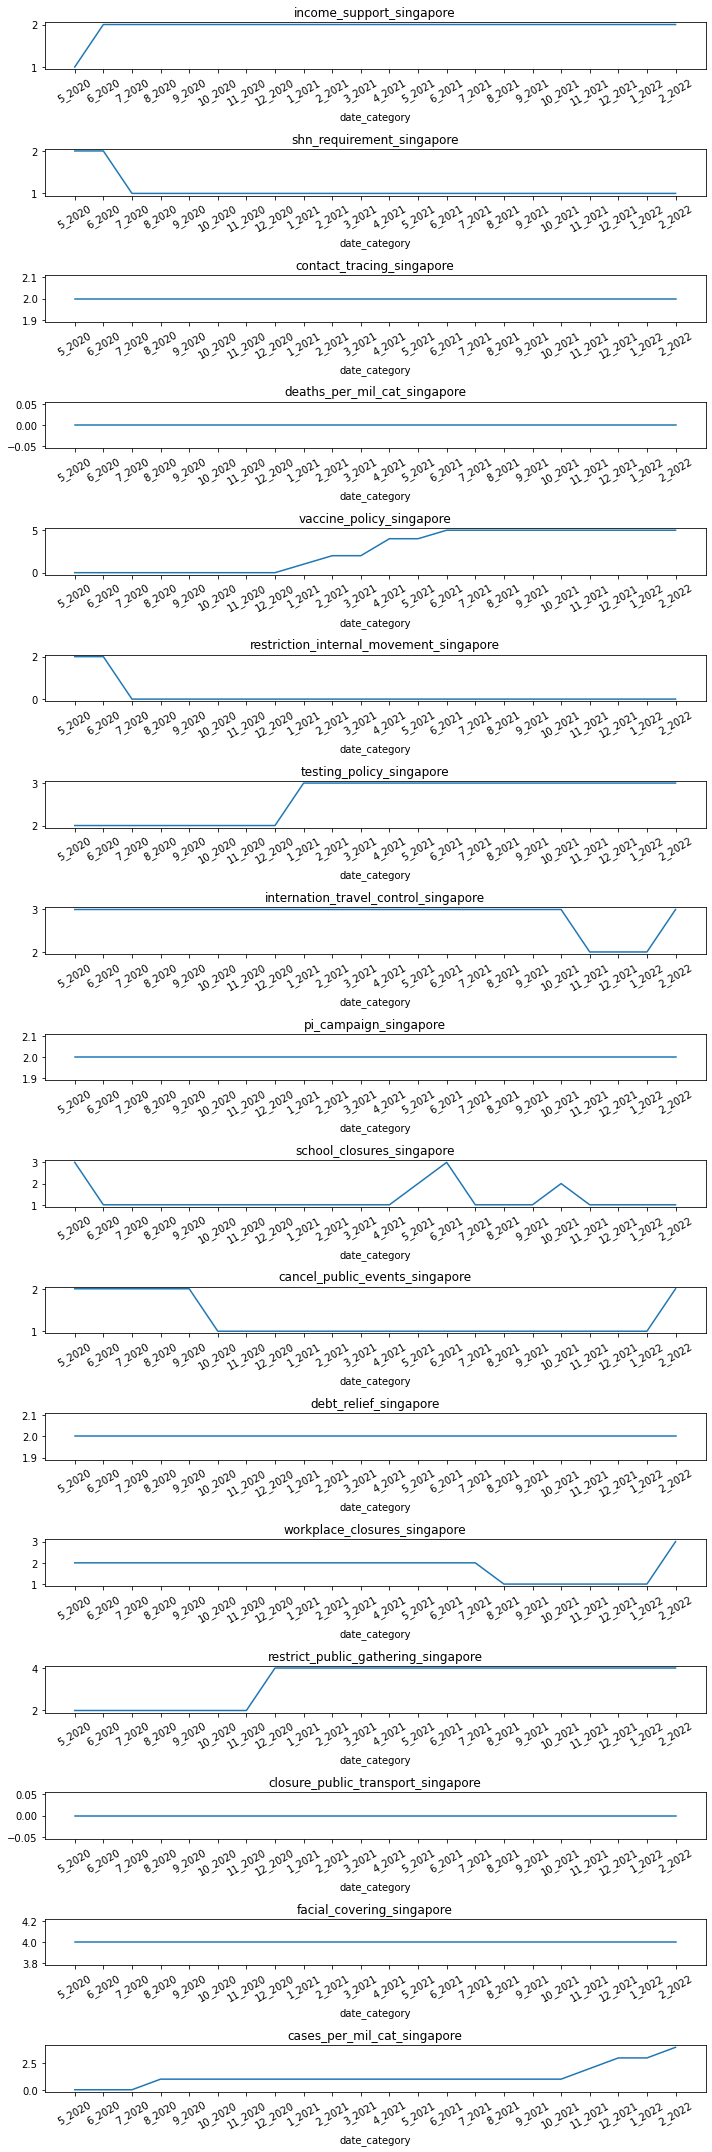

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(policy1_df.shape[1]-1, 1, figsize=(10,30))
for i in range(policy1_df.shape[1]-1):
  sns.lineplot(x="date_category", y = policy1_df.columns[i+1], data = policy1_df, ax=ax[i])
  ax[i].set_xticklabels(list(policy1_df["date_category"]),rotation = 30)
  ax[i].set_ylabel("")
  ax[i].set_title(f"{policy1_df.columns[i+1]}")
plt.tight_layout()